# Microsoft Project Initial Questions based on current market

* Is there a way to make use of all of Microsoft's current IP? 
* How do new franchises do in the current climate? 
* What subset of movies most closely model the current climate? 
* What are the midbudget options for franchises? 
* Besides a franchise what other options are there?

## Budget
Beginning with budgeting data to determine what a 'midbudget' movie looks like

In [2]:
import pandas as pd

In [3]:
! ls

Beyza-Genre&Rating.ipynb Leo Notebook 2.ipynb     final.ipynb
Horror.csv               Leo.ipynb                russmasterdata.ipynb
Jake.ipynb               Russell.ipynb
Leo 3.ipynb              exploratory.ipynb


In [4]:
cd ..

/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch


In [5]:
! ls

Main Database README.md     images        notebooks     zippedData


In [6]:
cd zippedData/

/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch/zippedData


In [7]:
! ls

all_genres_vs_budgets     im.db.zip                 tmdb.movies.csv
all_genres_vs_budgets.csv rt.movie_info.tsv         tmdb.movies.csv.gz
bom.movie_gross.csv       rt.movie_info.tsv.gz      tn.movie_budgets.csv
bom.movie_gross.csv.gz    rt.reviews.tsv            tn.movie_budgets.csv.gz
im.db                     rt.reviews.tsv.gz


In [8]:
budgets_raw = pd.read_csv('/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch/zippedData/tn.movie_budgets.csv.gz')
budgets_raw.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Budget Data Cleaning

I want to look at the release dates, movie titles, budgets, and compare those against worldwide gross. 

In [9]:
budgets = budgets_raw[['release_date', 'movie', 'production_budget', 'worldwide_gross']]
budgets.head()

,release_date,movie,production_budget,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


In [10]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   worldwide_gross    5782 non-null   object
dtypes: object(4)
memory usage: 180.8+ KB


I want to:
* look at release dates by month and year
* convert prod budget and gross into integers

In [11]:
budgets['release_month'] = budgets['release_date'].str[:3]
budgets['release_year'] = budgets['release_date'].str[-4:]
budgets['release_year'] = budgets['release_year'].astype(int)

<ipython-input-11-6cc998c7af12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets['release_month'] = budgets['release_date'].str[:3]


In [12]:
budgets['production_budget'] = budgets['production_budget'].str.strip('$')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.strip('$')
budgets['production_budget'] = budgets['production_budget'].str.replace(r'\W',"")
budgets['production_budget'] = budgets['production_budget'].astype(int)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(r'\W',"")
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(int)

In [13]:
budgets.head()

,release_date,movie,production_budget,worldwide_gross,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000,2776345279,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,May,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,Dec,2017


In [14]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   worldwide_gross    5782 non-null   int64 
 4   release_month      5782 non-null   object
 5   release_year       5782 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
budgets.describe()

,production_budget,worldwide_gross,release_year
count,5782.00000,5782.00000,5782.00000
mean,31587757.09651,91487460.90643,2003.96714
std,41812076.82694,174719968.77890,12.72439
min,1100.00000,0.00000,1915.00000
25%,5000000.00000,4125414.75000,2000.00000
50%,17000000.00000,27984448.50000,2007.00000
75%,40000000.00000,97645836.50000,2012.00000
max,425000000.00000,2776345279.00000,2020.00000


# First Look Visuals

In [17]:
import matplotlib.pyplot as plt

### Production Budget Trends v Year

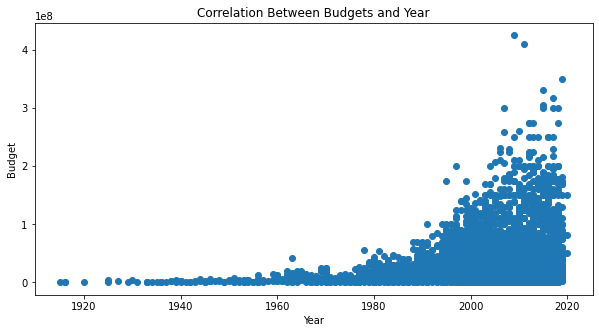

In [18]:
x = budgets['release_year']
y = budgets['production_budget']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Budget');

Text(0, 0.5, 'Budget')

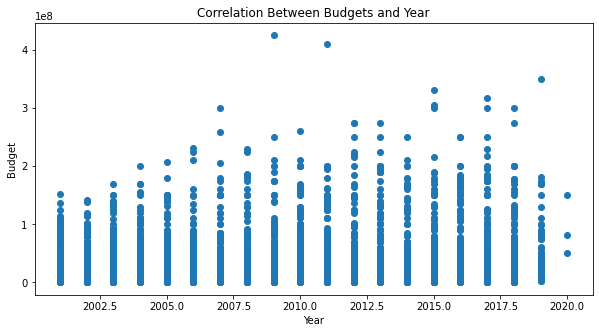

In [19]:
budgetsr = budgets[budgets['release_year'] > 2000]
x = budgetsr['release_year']
y = budgetsr['production_budget']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Budget')

### Production Budget v Gross

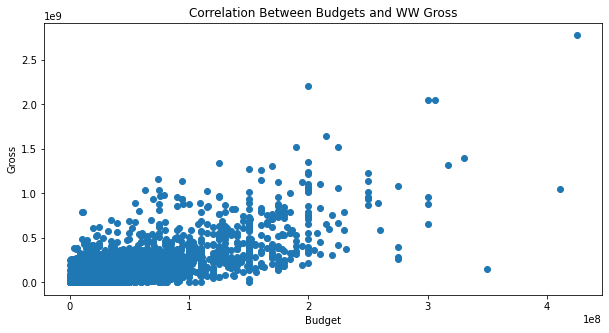

In [20]:
x = budgets['production_budget']
y = budgets['worldwide_gross']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and WW Gross')
ax.set_xlabel('Budget')
ax.set_ylabel('Gross');

In [21]:
#what do the movies that came out in 2020 look like? 

budgets2020 = budgets[(budgets['release_year'] == 2020)]
budgets2020

,release_date,movie,production_budget,worldwide_gross,release_month,release_year
194,"Dec 31, 2020",Moonfall,150000000,0,Dec,2020
535,"Feb 21, 2020",Call of the Wild,82000000,0,Feb,2020
1205,"Dec 31, 2020",Hannibal the Conqueror,50000000,0,Dec,2020


# BUDGET: WHAT IS MID?

* Need to adjust budget for inflation to get a more accurate understanding?
* Only look at movies in the last 20 years - Shrek was released in 2001
* For now I want to limit budget to interquartile range
* Movies in this data that came out in 2020 had no worldwide gross so I'm going to exclude them even though they are the most recent data


I'm looking at Shrek initially as a benchmark because based on my expertise I know that this film was responsible for a major shift in the way that we make/consume franchises

In [22]:
budgets_mid = budgets[(budgets['production_budget'] >= 5000000) & (budgets['production_budget'] <= 40000000) & (budgets['release_year'] >= 2015)]

In [23]:
budgets_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 1377 to 4399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       463 non-null    object
 1   movie              463 non-null    object
 2   production_budget  463 non-null    int64 
 3   worldwide_gross    463 non-null    int64 
 4   release_month      463 non-null    object
 5   release_year       463 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 25.3+ KB


In [24]:
budgets_mid['release_year'].value_counts()

2015    144
2016    117
2017     90
2018     75
2019     37
Name: release_year, dtype: int64

## Do movie budgets vary year to year?
### Looking at recession years - microsoft is making cuts

Text(0, 0.5, 'Budget')

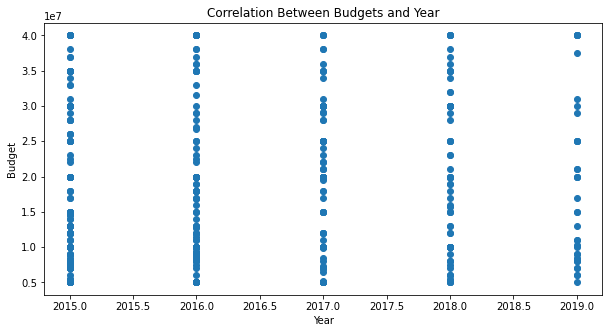

In [25]:
x = budgets_mid['release_year']
y = budgets_mid['production_budget']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Budget')

## Possible Worldwide Gross Outcomes

Text(0, 0.5, 'Gross')

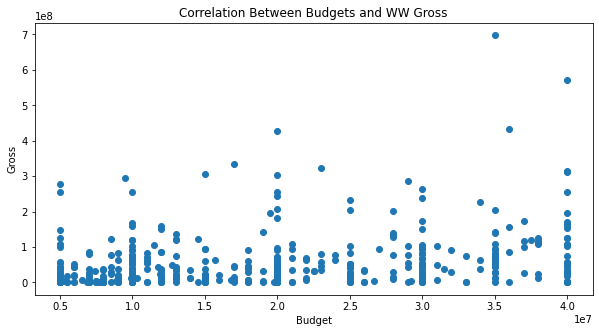

In [26]:
x = budgets_mid['production_budget']
y = budgets_mid['worldwide_gross']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and WW Gross')
ax.set_xlabel('Budget')
ax.set_ylabel('Gross')

In [27]:
budgets_mid.head()

,release_date,movie,production_budget,worldwide_gross,release_month,release_year
1377,"Feb 13, 2015",Fifty Shades of Grey,40000000,570998101,Feb,2015
1380,"May 17, 2019",John Wick: Chapter 3 â Parabellum,40000000,256498033,May,2019
1389,"Jun 10, 2016",The Conjuring 2: The Enfield Poltergeist,40000000,311262102,Jun,2016
1393,"Feb 10, 2017",John Wick: Chapter Two,40000000,171350009,Feb,2017
1394,"Jan 15, 2016",Ride Along 2,40000000,124827316,Jan,2016


In [28]:
budgets_mid.describe()

,production_budget,worldwide_gross,release_year
count,463.00000,463.00000,463.00000
mean,18999762.41901,55488309.22462,2016.44708
std,10909736.71260,78894820.52246,1.29472
min,5000000.00000,0.00000,2015.00000
25%,10000000.00000,5897634.00000,2015.00000
50%,18000000.00000,30700192.00000,2016.00000
75%,28000000.00000,73502539.50000,2017.00000
max,40000000.00000,697457969.00000,2019.00000


In [29]:
budgets_mid['release_year'].value_counts()

2015    144
2016    117
2017     90
2018     75
2019     37
Name: release_year, dtype: int64

# GENRE IDs

cleaning up genre ids so i can join it with budgets csv - want to identify budgets/gross/genre ids to support our initial findings

In [30]:
genre_id_raw = pd.read_csv('/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch/zippedData/tmdb.movies.csv.gz')
genre_id_raw = genre_id_raw[['genre_ids', 'title', 'release_date']]
genre_id_raw

,genre_ids,title,release_date
0,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,2010-11-19
1,"[14, 12, 16, 10751]",How to Train Your Dragon,2010-03-26
2,"[12, 28, 878]",Iron Man 2,2010-05-07
3,"[16, 35, 10751]",Toy Story,1995-11-22
4,"[28, 878, 12]",Inception,2010-07-16
...,...,...,...
26512,"[27, 18]",Laboratory Conditions,2018-10-13
26513,"[18, 53]",_EXHIBIT_84xxx_,2018-05-01
26514,"[14, 28, 12]",The Last One,2018-10-01
26515,"[10751, 12, 28]",Trailer Made,2018-06-22


In [31]:
genre_id_raw['release_year'] = genre_id_raw['release_date'].str[:4]
genre_id_raw['release_year'] = genre_id_raw['release_year'].astype(int)
genre_id_raw = genre_id_raw[['genre_ids', 'title', 'release_year']]
genre_id_raw.head()

,genre_ids,title,release_year
0,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,2010
1,"[14, 12, 16, 10751]",How to Train Your Dragon,2010
2,"[12, 28, 878]",Iron Man 2,2010
3,"[16, 35, 10751]",Toy Story,1995
4,"[28, 878, 12]",Inception,2010


In [32]:
genre_current = genre_id_raw[(genre_id_raw['release_year'] >= 2016)]
genre_current['release_year'].value_counts()

2016    3192
2017    3145
2018    2587
2019      63
2020       1
Name: release_year, dtype: int64

In [33]:
genre_current

,genre_ids,title,release_year
4535,"[99, 80, 36, 10770]",Inside The Mob's Bloody Valentine,2017
5030,"[35, 80]","Silent Night, Dead Night: A New Christmas Carol",2016
5316,"[28, 18, 36]",Rurouni Kenshin,2016
11225,"[80, 53, 9648, 18]",The Absent One,2016
11247,"[35, 18]",Infinitely Polar Bear,2016
...,...,...,...
26512,"[27, 18]",Laboratory Conditions,2018
26513,"[18, 53]",_EXHIBIT_84xxx_,2018
26514,"[14, 28, 12]",The Last One,2018
26515,"[10751, 12, 28]",Trailer Made,2018


In [34]:
budgets.head()

,release_date,movie,production_budget,worldwide_gross,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000,2776345279,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,May,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,Dec,2017


In [35]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   worldwide_gross    5782 non-null   int64 
 4   release_month      5782 non-null   object
 5   release_year       5782 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


In [36]:
budgets['movie'] = budgets['movie'].str.replace(' Ep. VII', '')

budgets.head()

,release_date,movie,production_budget,worldwide_gross,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000,2776345279,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,May,2015
4,"Dec 15, 2017",Star WarsI: The Last Jedi,317000000,1316721747,Dec,2017


In [37]:
something = budgets['movie'] == 'Star Wars: The Force Awakens'
something.value_counts()

False    5781
True        1
Name: movie, dtype: int64

In [38]:
budgets['movie'] = budgets['movie'].str.replace('Star WarsI', 'Star Wars')
budgets.head()

,release_date,movie,production_budget,worldwide_gross,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000,2776345279,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,May,2015
4,"Dec 15, 2017",Star Wars: The Last Jedi,317000000,1316721747,Dec,2017


In [39]:
budgets['release_month'] = budgets['release_month'].str.replace('Jan', '01')
budgets['release_month'] = budgets['release_month'].str.replace('Feb', '02')
budgets['release_month'] = budgets['release_month'].str.replace('Mar', '03')
budgets['release_month'] = budgets['release_month'].str.replace('Apr', '04')
budgets['release_month'] = budgets['release_month'].str.replace('May', '05')
budgets['release_month'] = budgets['release_month'].str.replace('Jun', '06')
budgets['release_month'] = budgets['release_month'].str.replace('Jul', '07')
budgets['release_month'] = budgets['release_month'].str.replace('Aug', '08')
budgets['release_month'] = budgets['release_month'].str.replace('Sep', '09')
budgets['release_month'] = budgets['release_month'].str.replace('Oct', '10')
budgets['release_month'] = budgets['release_month'].str.replace('Nov', '11')
budgets['release_month'] = budgets['release_month'].str.replace('Dec', '12')
budgets['release_month'] = budgets['release_month'].astype(int)
budgets.head()

,release_date,movie,production_budget,worldwide_gross,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000,2776345279,12,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,5,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350,6,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,5,2015
4,"Dec 15, 2017",Star Wars: The Last Jedi,317000000,1316721747,12,2017


In [40]:
budgets = budgets[(budgets['release_year'] >= 2016)]
budgets['release_year'].value_counts()

2016    219
2017    168
2018    143
2019     67
2020      3
Name: release_year, dtype: int64

In [41]:
budgets.describe()

,production_budget,worldwide_gross,release_month,release_year
count,600.00000,600.00000,600.00000,600.00000
mean,46796283.33333,149948419.98500,6.59500,2017.11167
std,57374337.54672,253763078.13732,3.61424,1.04132
min,7000.00000,0.00000,1.00000,2016.00000
25%,9000000.00000,7547908.00000,3.00000,2016.00000
50%,25000000.00000,46335146.50000,6.00000,2017.00000
75%,59625000.00000,169251986.25000,10.00000,2018.00000
max,350000000.00000,2048134200.00000,12.00000,2020.00000


# JOIN

budgets and genres

In [42]:
budgets_genres = budgets.merge(genre_current,
             left_on='movie',
             right_on = 'title',
             how='inner')
budgets_genres

,release_date,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,title,release_year_y
0,"Dec 15, 2017",Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Star Wars: The Last Jedi,2017
1,"Dec 15, 2017",Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Star Wars: The Last Jedi,2017
2,"Apr 27, 2018",Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]",Avengers: Infinity War,2018
3,"Nov 17, 2017",Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]",Justice League,2017
4,"Nov 17, 2017",Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]",Justice League,2017
...,...,...,...,...,...,...,...,...,...
535,"Jun 16, 2017",Arrowhead,180000,0,6,2017,"[28, 12, 9648, 878]",Arrowhead,2017
536,"Jun 3, 2016",The Fits,170000,169242,6,2016,[18],The Fits,2016
537,"Jul 7, 2017",A Ghost Story,100000,2769782,7,2017,"[18, 14, 10749]",A Ghost Story,2017
538,"Mar 18, 2016",Krisha,30000,144822,3,2016,[18],Krisha,2016


In [87]:
budgets_genres_all = budgets_genres[['movie', 'production_budget', 'worldwide_gross','release_month', 'release_year_x', 'genre_ids']]
budgets_genres_all

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
2,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
3,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
4,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
...,...,...,...,...,...,...
535,Arrowhead,180000,0,6,2017,"[28, 12, 9648, 878]"
536,The Fits,170000,169242,6,2016,[18]
537,A Ghost Story,100000,2769782,7,2017,"[18, 14, 10749]"
538,Krisha,30000,144822,3,2016,[18]


In [1]:
budgets_genres_all = budgets_genres_all.drop_duplicates(subset= 'movie')
budgets_genres_all.head(20)

NameError: name 'budgets_genres_all' is not defined

In [89]:
budgets_genres_all.to_csv('all_genres_vs_budgets.csv', index=False)

In [90]:
! ls

all_genres_vs_budgets     im.db.zip                 tmdb.movies.csv
all_genres_vs_budgets.csv rt.movie_info.tsv         tmdb.movies.csv.gz
bom.movie_gross.csv       rt.movie_info.tsv.gz      tn.movie_budgets.csv
bom.movie_gross.csv.gz    rt.reviews.tsv            tn.movie_budgets.csv.gz
im.db                     rt.reviews.tsv.gz
